# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# 1. Data Preprocessing

## Data Exploration

In [3]:
#Dataframe Settings
pd.set_option('display.max_columns', 90)
pd.set_option('max_colwidth', 1000)
# Load train test set
train_set = pd.read_csv("./data/raw/train.csv", na_values=['NA'], keep_default_na=False)
test_set = pd.read_csv("./data/raw/test.csv", na_values=['NA'], keep_default_na=False)
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train_set.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
# Count missing values per column
missing_df = pd.DataFrame(train_set.isnull().sum(), columns=['MissingValues'])
#Convert to integer
missing_df['MissingValues'] = missing_df['MissingValues'].astype(int)
# Filter only columns where MissingValues > 0
missing_df = missing_df[missing_df['MissingValues'] > 0]
# Optional: move index into a visible column
missing_df = missing_df.reset_index().rename(columns={'index': 'Column'})
missing_df

,Column,MissingValues
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,8
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


In [6]:
# Identify what cols include "NA" as an attribute as default
na_meaningful_cols = [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]

# Columns with missing values in the dataset
cols_with_missing = missing_df['Column'].tolist()

# True-missing columns
true_missing_cols = [col for col in cols_with_missing if col not in na_meaningful_cols]

print("Columns that need to be processed:")
print(true_missing_cols)

Columns that need to be processed:
['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']


In [7]:
# Cols that need to be processed
filter_cols = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']
train_set[filter_cols].head()

,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt
0,65.0,BrkFace,196.0,SBrkr,2003.0
1,80.0,None,0.0,SBrkr,1976.0
2,68.0,BrkFace,162.0,SBrkr,2001.0
3,60.0,None,0.0,SBrkr,1998.0
4,84.0,BrkFace,350.0,SBrkr,2000.0


## Data Cleaning/ Mapping

In [8]:
def data_cleaning_and_mapping(df):
    df["LotFrontage"]= df['LotFrontage'].fillna(0)
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df.loc[df['MasVnrType'] == 'None', 'MasVnrArea'] = 0
    df["GarageYrBlt"]= df['GarageYrBlt'].fillna(0).astype(int)
    df=df.dropna(subset=['Electrical'])
    print("No. of missing values in certain Cols\n",df[filter_cols].isnull().sum())

    cat_cols = df.select_dtypes(include=["object"]).columns
    df[cat_cols] = df[cat_cols].fillna("None")

    data_categories = {
        "Alley": ["None", "Grvl", "Pave"],
        "Fence": ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"],
        "PoolQC": ["None", "Fa", "TA", "Gd", "Ex"],
        "FireplaceQu": ["None", "Po", "Fa", "TA", "Gd", "Ex"],
        "GarageFinish": ["None", "Unf", "RFn", "Fin"],
        "GarageType": ["None", "Detchd", "CarPort", "BuiltIn", "Basment", "Attchd", "2Types"],
        "MiscFeature": ["None", "Shed", "Gar2", "Othr", "TenC"],
        "MasVnrType": ["None", "BrkCmn", "BrkFace", "CBlock", "Stone"]
    }

    categories = []
    for col in cat_cols:
        if col in data_categories:
            categories.append(data_categories[col])
        else:
            categories.append(sorted(df[col].dropna().unique().tolist()))

    print(f"Encoding {len(cat_cols)} categorical columns using OrdinalEncoder")
    encoder = OrdinalEncoder(categories=categories,handle_unknown="use_encoded_value", unknown_value=-1)
    df[cat_cols] = encoder.fit_transform(df[cat_cols])
    print("Encoding complete.")
    return df

In [9]:
cleaned_train_set = data_cleaning_and_mapping(train_set)
cleaned_test_set = data_cleaning_and_mapping(test_set)

No. of missing values in certain Cols
 LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64
Encoding 43 categorical columns using OrdinalEncoder
Encoding complete.
No. of missing values in certain Cols
 LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64
Encoding 43 categorical columns using OrdinalEncoder
Encoding complete.


C:\Users\l1871\AppData\Local\Temp\ipykernel_12768\3500126117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna("None")
C:\Users\l1871\AppData\Local\Temp\ipykernel_12768\3500126117.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = encoder.fit_transform(df[cat_cols])


## Output CSVs

In [11]:
cleaned_train_set.to_csv("./data/cleaned/train.csv", index=False)
cleaned_test_set.to_csv("./data/cleaned/test.csv", index=False)

# 2. Feature Selection

## Method 1: mutual info regression

In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Ensure output directory exists
os.makedirs("./data/selected", exist_ok=True)

# Load data
train = pd.read_csv("./data/cleaned/train.csv")
test = pd.read_csv("./data/cleaned/test.csv")
train = train.drop(columns=['Id'], errors='ignore')
test = test.drop(columns=['Id'], errors='ignore')

X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Method 1: Filter (Mutual Info)
selector_mi = SelectKBest(score_func=mutual_info_regression, k=40)
selector_mi.fit(X, y)
selected_features_mi = X.columns[selector_mi.get_support()].tolist()

# Save
pd.DataFrame(selected_features_mi, columns=['Feature']).to_csv("./data/selected/filter_selected_features.csv", index=False)
train[['SalePrice'] + selected_features_mi].to_csv("./data/selected/train_filter.csv", index=False)
test[selected_features_mi].to_csv("./data/selected/test_filter.csv", index=False)

print("✅ Method 1 completed. Files saved to ./data/selected/")

✅ Method 1 completed. Files saved to ./data/selected/


## Method 2: XGBoost Feature Importance Scores

In [7]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold

# Ensure output directory exists
os.makedirs("./data/selected", exist_ok=True)

# Load cleaned data
train = pd.read_csv("./data/cleaned/train.csv")
test = pd.read_csv("./data/cleaned/test.csv")

# Remove 'Id' if present
train = train.drop(columns=['Id'], errors='ignore')
test = test.drop(columns=['Id'], errors='ignore')

# Separate features and target
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

print(f"Original number of features: {X.shape[1]}")

# --- XGBoost Feature Selection with 5-Fold CV ---
features = X.columns.tolist()
importances = np.zeros(len(features))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Training XGBoost with 5-Fold CV to compute feature importances...")

for train_idx, val_idx in kf.split(X, y):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = xgb.XGBRegressor(
        n_estimators=600,
        max_depth=3,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=1.0,
        random_state=42,
        eval_metric='rmse'
    )
    model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
    importances += model.feature_importances_

importances /= kf.n_splits

# Select top 30 features
feature_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

TOP_N = 30
selected_features = feature_imp_df.head(TOP_N)['Feature'].tolist()

print(f"\n✅ Top {TOP_N} selected features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i:2d}. {feat}")

# --- Save with your requested naming ---
pd.DataFrame(selected_features, columns=['Feature']).to_csv(
    "./data/selected/Method2_selected_features.csv", index=False
)

train[selected_features + ['SalePrice']].to_csv(
    "./data/selected/train_Method2_selected.csv", index=False
)

test[selected_features].to_csv(
    "./data/selected/test_Method2_selected.csv", index=False
)

print("\n✅ Files saved with 'Method2_selected' naming:")
print("   - ./data/selected/Method2_selected_features.csv")
print("   - ./data/selected/train_Method2_selected.csv")
print("   - ./data/selected/test_Method2_selected.csv")

Original number of features: 79
Training XGBoost with 5-Fold CV to compute feature importances...

✅ Top 30 selected features:
 1. OverallQual
 2. GarageCars
 3. ExterQual
 4. BsmtQual
 5. GarageFinish
 6. GrLivArea
 7. FullBath
 8. GarageType
 9. KitchenQual
10. TotalBsmtSF
11. FireplaceQu
12. 2ndFlrSF
13. BsmtFinSF1
14. TotRmsAbvGrd
15. CentralAir
16. 1stFlrSF
17. YearRemodAdd
18. LandContour
19. Fireplaces
20. GarageArea
21. HalfBath
22. YearBuilt
23. LotArea
24. BsmtFinType1
25. GarageCond
26. BsmtExposure
27. MSZoning
28. OpenPorchSF
29. OverallCond
30. Neighborhood

✅ Files saved with 'Method2_selected' naming:
   - ./data/selected/Method2_selected_features.csv
   - ./data/selected/train_Method2_selected.csv
   - ./data/selected/test_Method2_selected.csv


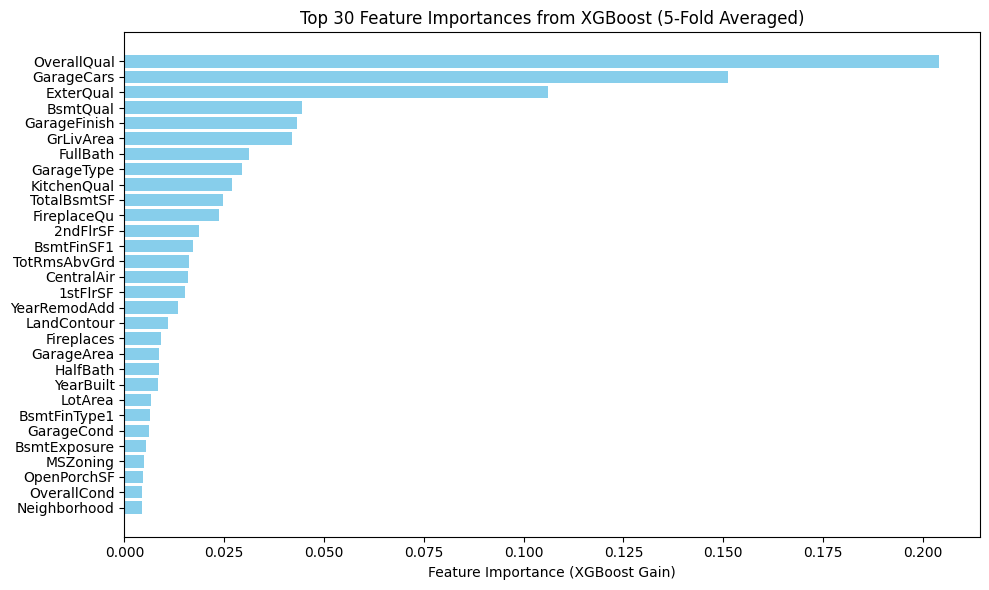

In [ ]:
# method2 xgboost featured important list
import matplotlib.pyplot as plt

# --- Plot Feature Importances ---
plt.figure(figsize=(10, 6))
plt.barh(
    feature_imp_df['Feature'].iloc[:30][::-1],    
    feature_imp_df['Importance'].iloc[:30][::-1],
    color='skyblue'
)
plt.xlabel("Feature Importance (XGBoost Gain)")
plt.title("Top 30 Feature Importances from XGBoost (5-Fold Averaged)")
plt.tight_layout()
plt.show()

## Method 3

In [ ]:
# load data
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv("./data/cleaned/train.csv")
target = "SalePrice"

### delete hight correlation features

In [ ]:
# Compute Pearson correlation coefficients between all numerical features and the target variable (SalePrice),
# and sort them by absolute value in descending order.
r_target = df[num_cols].corr(method="pearson")[target].sort_values(key=np.abs, ascending=False)
print(r_target.to_string())  

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
ExterQual       -0.636909
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
BsmtQual        -0.593871
KitchenQual     -0.589276
FullBath         0.560881
GarageFinish     0.549809
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
FireplaceQu      0.520507
YearRemodAdd     0.507430
MasVnrArea       0.473452
Fireplaces       0.466968
MasVnrType       0.424464
GarageType       0.415266
HeatingQC       -0.400160
BsmtFinSF1       0.386436
Foundation       0.382671
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
BsmtExposure    -0.309014
HalfBath         0.284400
LotArea          0.263837
GarageYrBlt      0.261413
LotShape        -0.255545
CentralAir       0.251367
GarageCond       0.246749
Electrical       0.234990
PavedDrive       0.231399
BsmtFullBath     0.227082
RoofStyle        0.222369
BsmtUnfSF        0.214446
SaleConditio

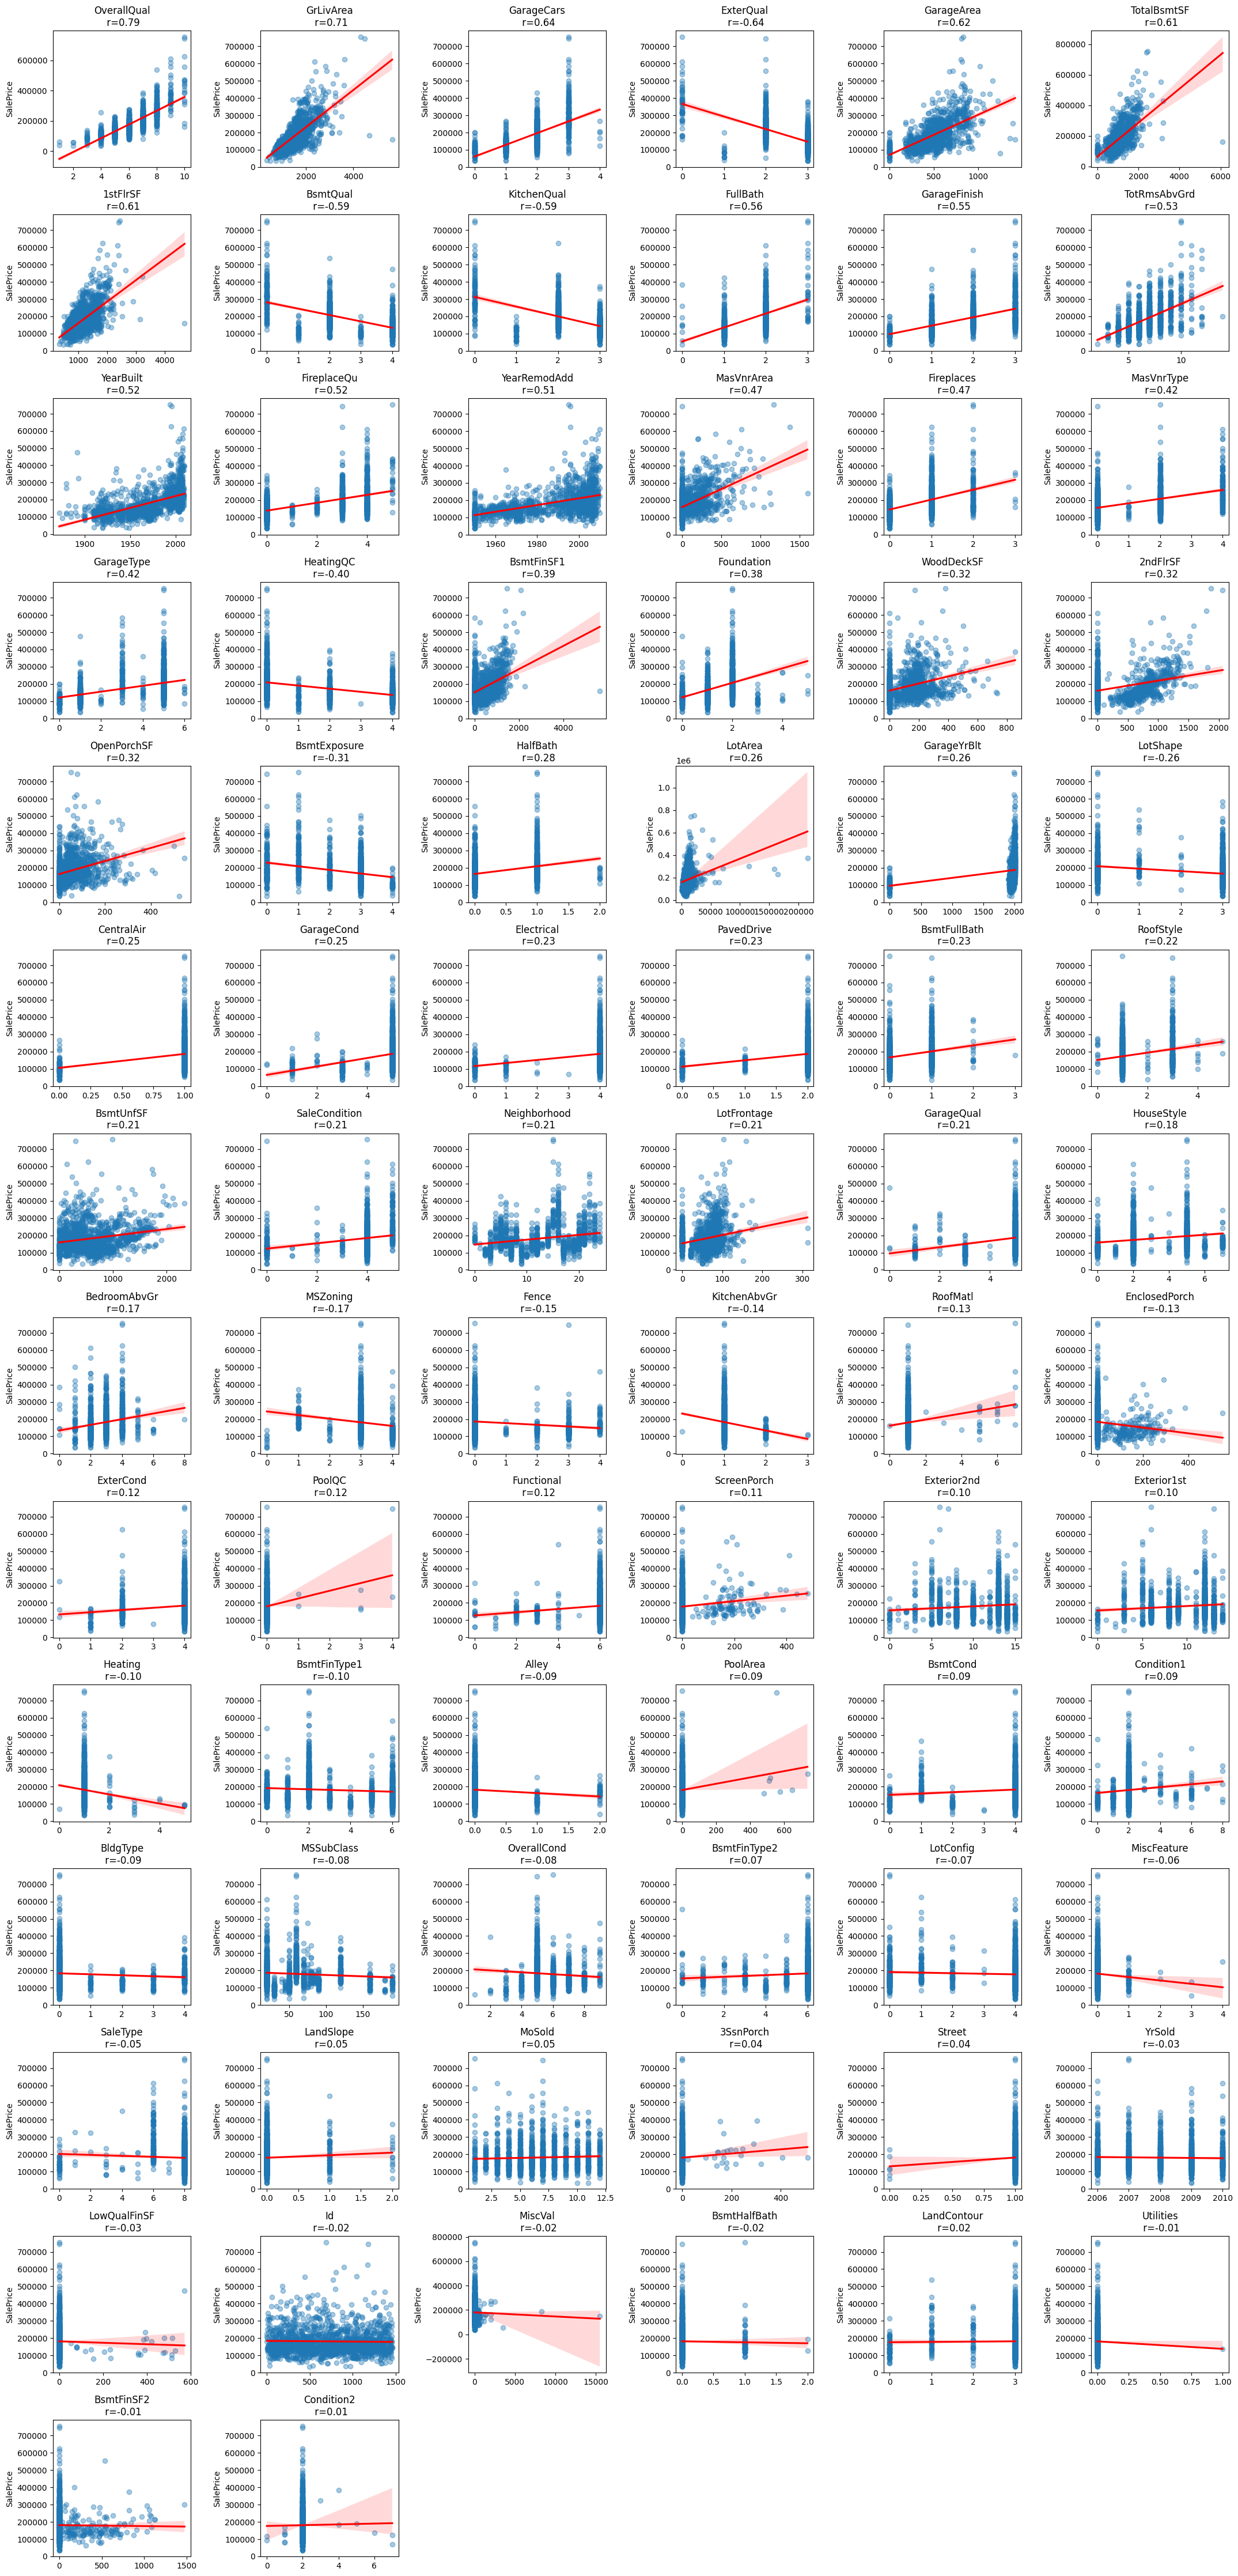

In [ ]:
# Visualize the relationship between features and targets
num_cols = df.select_dtypes(include=['number']).columns.tolist()
order = r_target.drop(labels=[target]).abs().sort_values(ascending=False).index
n = len(order); ncols = 6; nrows = int(np.ceil(n/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(3.6*ncols, 3.2*nrows))
axes = np.atleast_1d(axes).ravel()

for ax, feat in zip(axes, order):
    sns.regplot(x=df[feat], y=df[target], ax=ax, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    r = df[[feat, target]].corr().iloc[0,1]
    ax.set_title(f"{feat}\n r={r:.2f}"); ax.set_xlabel(""); ax.set_ylabel(target)
for ax in axes[len(order):]: ax.set_visible(False)
plt.tight_layout(); plt.show()


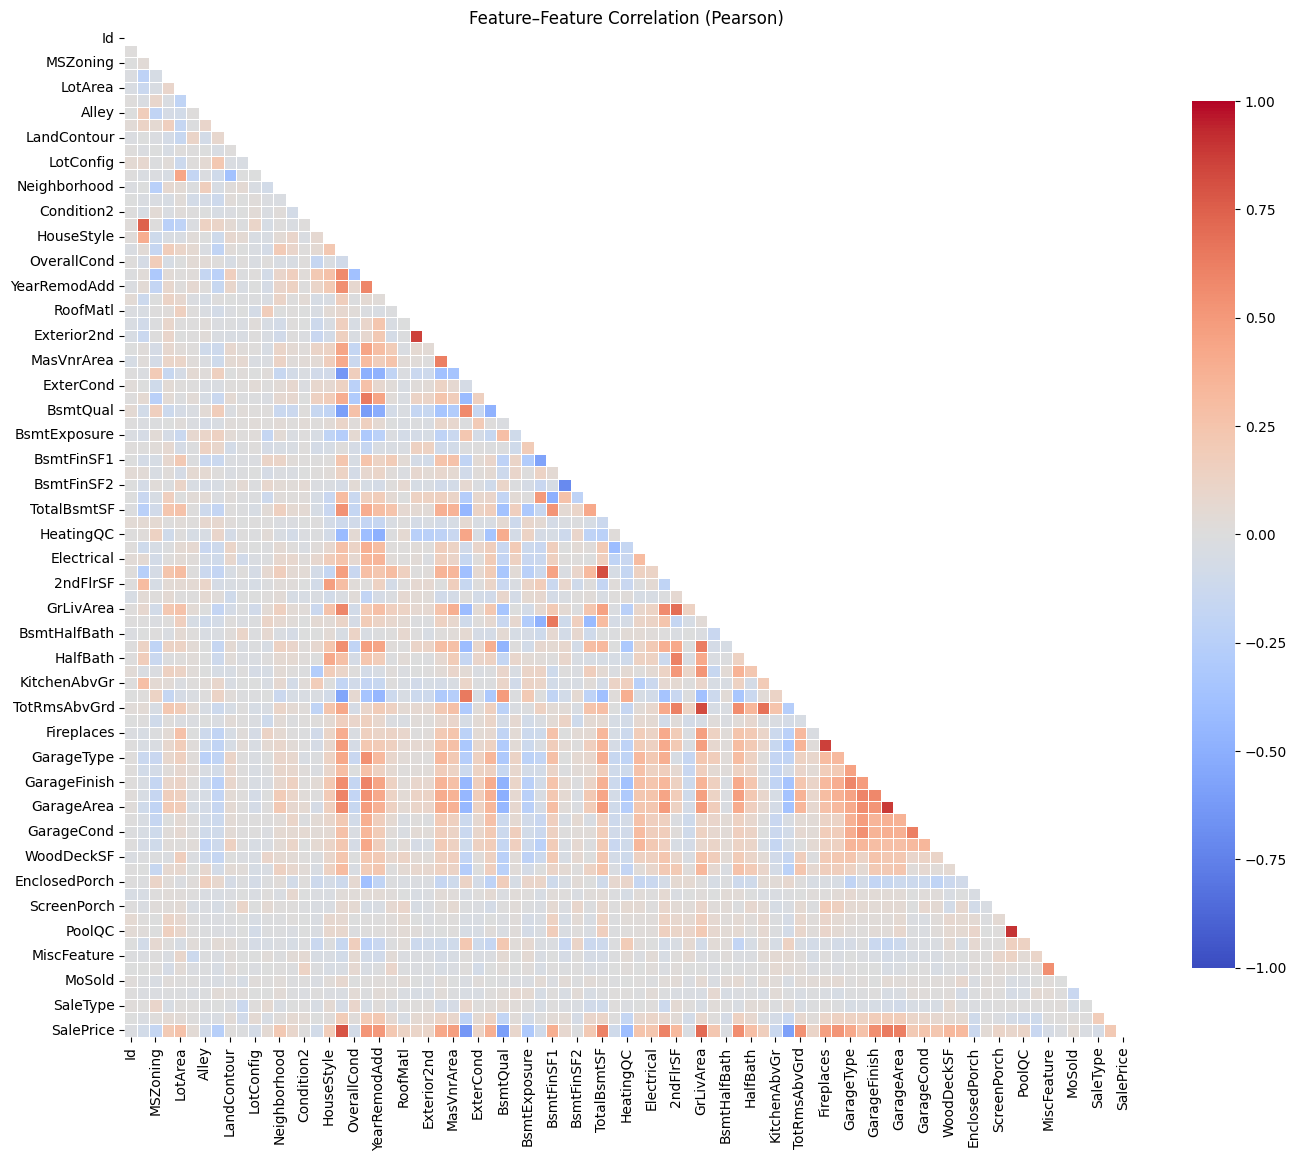

In [ ]:
# Visualize the relationships among numerical features
corr = df[num_cols].corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14,12))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, vmin=-1, vmax=1,
            square=True, linewidths=.4, cbar_kws={"shrink": .8})
plt.title("Feature–Feature Correlation (Pearson)"); plt.tight_layout(); plt.show()


In [ ]:
# Compute pairwise Pearson correlation coefficients among all numerical features,
# and filter out feature pairs with correlation above a given threshold (i.e., highly collinear features).
thr = 0.7  # Adjustable: 0.75–0.90
pairs = (corr.abs()
         .where(~np.eye(len(corr), dtype=bool))
         .stack().reset_index()
         .rename(columns={'level_0':'feat1','level_1':'feat2',0:'abs_r'})
         .sort_values('abs_r', ascending=False))
high_pairs = pairs[pairs['abs_r'] >= thr]
print(high_pairs.to_string())


             feat1         feat2     abs_r
5751      PoolArea        PoolQC  0.899923
5831        PoolQC      PoolArea  0.899923
4941    GarageCars    GarageArea  0.882613
5021    GarageArea    GarageCars  0.882613
4536    Fireplaces   FireplaceQu  0.863152
4616   FireplaceQu    Fireplaces  0.863152
1863   Exterior1st   Exterior2nd  0.854107
1943   Exterior2nd   Exterior1st  0.854107
3733     GrLivArea  TotRmsAbvGrd  0.825576
4366  TotRmsAbvGrd     GrLivArea  0.825576
3082   TotalBsmtSF      1stFlrSF  0.819393
3478      1stFlrSF   TotalBsmtSF  0.819393
6417     SalePrice   OverallQual  0.791069
1439   OverallQual     SalePrice  0.791069
94      MSSubClass      BldgType  0.746337
1201      BldgType    MSSubClass  0.746337
3759     GrLivArea     SalePrice  0.708618
6446     SalePrice     GrLivArea  0.708618
2835  BsmtFinType2    BsmtFinSF2  0.706284
2915    BsmtFinSF2  BsmtFinType2  0.706284


In [24]:
# Sort features by their correlation strength with the target, 
# then iteratively select representative features while marking highly correlated ones for removal.
# This ensures that within each correlation cluster, only the most informative feature is retained.
to_drop = set(); visited = set()
order_for_prune = r_target.drop(labels=[target]).abs().index  # From strongest to weakest correlation

for f in order_for_prune:
    if f in to_drop or f in visited: 
        continue
    visited.add(f)
    buddies = corr[f].abs()
    buddies = buddies[(buddies >= thr) & (~buddies.index.isin({f, target}))].index
    for g in buddies:
        if g not in visited:
            # For stricter pruning: drop g only if r_target[g] <= r_target[f]
            to_drop.add(g)

print(f"Suggested to drop: {len(to_drop)} features\n", sorted(to_drop)[:20])
# X_reduced = df.drop(columns=list(to_drop))


Suggested to drop: 8 features
 ['1stFlrSF', 'BsmtFinSF2', 'Exterior1st', 'Fireplaces', 'GarageArea', 'MSSubClass', 'PoolArea', 'TotRmsAbvGrd']


### find valuable featured

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

# ===== Your data =====
df = pd.read_csv("./data/cleaned/train.csv")
target = "SalePrice"

# Collinear features to drop (from your previous step)
to_drop = ['1stFlrSF', 'BsmtFinSF2', 'Exterior1st', 'Fireplaces', 'GarageArea', 'MSSubClass', 'PoolArea', 'TotRmsAbvGrd']  

# Drop target and collinear features; keep only numerical columns
X = df.drop(columns=[target] + to_drop).select_dtypes(include=[np.number]).copy()
y = df[target].copy()

# ===== Hyperparameter grid (compact but representative) =====
param_grid = [
    {"max_depth": 4, "learning_rate": 0.05, "subsample": 0.9, "colsample_bytree": 0.8, "min_child_weight": 1, "reg_lambda": 1.0},
    {"max_depth": 6, "learning_rate": 0.05, "subsample": 0.8, "colsample_bytree": 0.8, "min_child_weight": 3, "reg_lambda": 1.0},
    {"max_depth": 6, "learning_rate": 0.10, "subsample": 0.8, "colsample_bytree": 0.6, "min_child_weight": 1, "reg_lambda": 1.0},
    {"max_depth": 8, "learning_rate": 0.05, "subsample": 0.7, "colsample_bytree": 0.8, "min_child_weight": 1, "reg_lambda": 2.0},
]

# ===== CV setup =====
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  # 10 total splits
features = X.columns.tolist()

# Accumulators
gain_sum = pd.Series(0.0, index=features)
perm_sum = pd.Series(0.0, index=features)
topk_hits = pd.Series(0, index=features)
runs = 0

# ===== Training loop =====
for params in param_grid:
    for tr_idx, va_idx in rkf.split(X, y):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        model = XGBRegressor(
            n_estimators=600,
            objective="reg:squarederror",
            eval_metric="rmse",
            random_state=42,
            **params
        )
        model.fit(X_tr, y_tr)

        # 1) Gain importance (normalize to sum to 1 to avoid dependency on number of trees)
        gain = pd.Series(model.get_booster().get_score(importance_type="gain"))
        gain = gain.reindex(features).fillna(0.0)
        if gain.sum() > 0:
            gain = gain / gain.sum()
        gain_sum += gain

        # 2) Permutation importance: computed on the validation set
        pi = permutation_importance(model, X_va, y_va, n_repeats=5, random_state=42, scoring=None)
        perm = pd.Series(pi.importances_mean, index=features)
        # Clip negatives to zero (noise can yield negative lifts)
        perm[perm < 0] = 0.0
        if perm.sum() > 0:
            perm = perm / perm.sum()
        perm_sum += perm

        # 3) Count Top-K hits (K = 20% of features, at least 10)
        K = max(10, int(len(features) * 0.2))
        topk = gain.sort_values(ascending=False).head(K).index
        topk_hits[topk] += 1

        runs += 1

# ===== Aggregate stability metrics =====
res = pd.DataFrame({
    "mean_gain": (gain_sum / runs),
    "mean_perm": (perm_sum / runs),
    "freq_topk": (topk_hits / runs)  # Proportion of times a feature entered Top-K
})
# Composite score: weighted average (customize if desired)
res["score"] = 0.6 * res["mean_gain"] + 0.4 * res["mean_perm"]
res = res.sort_values("score", ascending=False)

# ===== Selection rules (tunable) =====
# Rule A: Top-K hit frequency ≥ 0.6
stable = res[res["freq_topk"] >= 0.6]

# Rule B: cumulative contribution up to 95% by composite score
cum = res["score"].cumsum() / res["score"].sum()
cut = cum[cum <= 0.95].index
selected = list(set(stable.index).union(set(cut)))  # Stability + cumulative contribution

print(f"Total features: {len(features)}")
print(f"Retained after stability selection: {len(selected)}")
print("\nAll stable features (sorted by score):")
print(res.loc[selected].sort_values("score", ascending=False).to_string())

# Final selected feature matrix:
X_selected = X[selected]


Total features: 72
Retained after stability selection: 31

All stable features (sorted by score):
               mean_gain  mean_perm  freq_topk     score
OverallQual     0.276882   0.388237   1.000000  0.321424
GarageCars      0.237019   0.037893   1.000000  0.157369
GrLivArea       0.032988   0.254279   1.000000  0.121505
ExterQual       0.114707   0.006413   1.000000  0.071390
TotalBsmtSF     0.017326   0.064985   1.000000  0.036389
BsmtQual        0.044551   0.009619   1.000000  0.030578
FullBath        0.034777   0.004782   0.883333  0.022779
BsmtFinSF1      0.010427   0.028192   0.800000  0.017533
KitchenQual     0.023057   0.006124   0.983333  0.016284
YearBuilt       0.006024   0.024117   0.116667  0.013261
Neighborhood    0.004161   0.025743   0.000000  0.012794
CentralAir      0.019924   0.001091   0.950000  0.012390
2ndFlrSF        0.010747   0.014642   0.650000  0.012305
LotArea         0.004110   0.022596   0.000000  0.011504
OverallCond     0.004299   0.020514   0.000000 

### generate new feature file

In [ ]:
import os
import pandas as pd

# Original folder paths
input_folder = "./data/cleaned"
output_folder = "./data/featured/Method3,selected/"

# Create the new folder if it doesn’t already exist
os.makedirs(output_folder, exist_ok=True)

# Read original datasets
train = pd.read_csv(f"{input_folder}/train.csv")
test = pd.read_csv(f"{input_folder}/test.csv")

# ===== Stable features selected =====
selected_features = [
    'OverallQual', 'GarageCars', 'GrLivArea', 'ExterQual', 'TotalBsmtSF',
    'BsmtQual', 'FullBath', 'BsmtFinSF1', 'KitchenQual', 'YearBuilt',
    'Neighborhood', 'CentralAir', '2ndFlrSF', 'LotArea', 'OverallCond',
    'FireplaceQu', 'YearRemodAdd', 'GarageFinish', 'KitchenAbvGr',
    'GarageType', 'LandContour', 'MSZoning', 'LotFrontage', 'SaleCondition',
    'BsmtFullBath', 'RoofMatl', 'BsmtExposure', 'HalfBath', 'BedroomAbvGr',
    'GarageYrBlt', 'BsmtFinType1'
]

# ===== Select features for train and test =====
train_selected = train[selected_features + ['SalePrice']]
test_selected = test[[col for col in selected_features if col in test.columns]]

# ===== Save results =====
train_selected.to_csv(f"{output_folder}/train_selected.csv", index=False)
test_selected.to_csv(f"{output_folder}/test_selected.csv", index=False)

print(f"✅ Generated: {output_folder}/train_selected.csv and test_selected.csv")
print(f"Train shape: {train_selected.shape}")
print(f"Test shape: {test_selected.shape}")
